In [1]:
%pylab inline
#sys.path.insert(0, '/home/peter/code/projects/tradesys/')
from tradesys import *
from tradesys.testing import *
import talib as ta
from sklearn.preprocessing import scale
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Using Theano backend.


In [2]:
df = pd.read_csv('Coinbase_BTCUSD_1h.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2019-06-13 12-AM,BTCUSD,8176.02,8198.38,8145.66,8168.60,269.51,2201902.76
1,2019-06-12 11-PM,BTCUSD,8160.00,8177.72,8122.00,8176.02,485.89,3961368.12
2,2019-06-12 10-PM,BTCUSD,8154.99,8160.00,8121.64,8160.00,306.47,2496169.22
3,2019-06-12 09-PM,BTCUSD,8122.97,8161.32,8115.72,8154.99,234.17,1906795.12
4,2019-06-12 08-PM,BTCUSD,8171.30,8175.00,8094.00,8122.97,603.35,4906710.29


In [3]:
nd = []
for i,(d,o,h,l,c,v) in df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume BTC']].iterrows():
    ds = d.split(' ')[0].split('-')
    hs = d.split(' ')[1].split('-')[:-1]
    ds = [int(x) for x in ds]
    hs = [int(x) for x in hs]
    nd.append(ds + hs + [0,0] + [o,h,l,c,v])
nd

[[2019, 6, 13, 12, 0, 0, 8176.02, 8198.38, 8145.66, 8168.6, 269.51],
 [2019, 6, 12, 11, 0, 0, 8160.0, 8177.72, 8122.0, 8176.02, 485.89],
 [2019, 6, 12, 10, 0, 0, 8154.99, 8160.0, 8121.64, 8160.0, 306.47],
 [2019, 6, 12, 9, 0, 0, 8122.97, 8161.32, 8115.72, 8154.99, 234.17],
 [2019, 6, 12, 8, 0, 0, 8171.3, 8175.0, 8094.0, 8122.97, 603.35],
 [2019, 6, 12, 7, 0, 0, 8152.9, 8183.61, 8137.76, 8171.3, 310.01],
 [2019, 6, 12, 6, 0, 0, 8158.49, 8172.9, 8138.57, 8152.9, 320.82],
 [2019, 6, 12, 5, 0, 0, 8180.0, 8188.5, 8120.0, 8158.49, 808.03],
 [2019, 6, 12, 4, 0, 0, 8192.56, 8221.15, 8170.0, 8180.0, 996.01],
 [2019, 6, 12, 3, 0, 0, 8019.88, 8292.43, 8019.88, 8192.56, 2057.16],
 [2019, 6, 12, 2, 0, 0, 8016.62, 8048.0, 7929.11, 8019.88, 779.99],
 [2019, 6, 12, 1, 0, 0, 8012.53, 8029.7, 7985.0, 8016.62, 191.58],
 [2019, 6, 12, 12, 0, 0, 7997.72, 8062.9, 7990.0, 8012.53, 382.69],
 [2019, 6, 12, 11, 0, 0, 7990.18, 8036.2, 7978.17, 7997.72, 196.4],
 [2019, 6, 12, 10, 0, 0, 7965.95, 8072.97, 7965.93, 

In [4]:
datamatrix = DataMatrix()
for y,mn,d,hr,m,s, o,h,l,c,v in nd[::-1]:
    datamatrix.add_row(DateTime(y,mn,d,hr,m,s), o,h,l,c,int(v))

In [5]:
#dmat2df(datamatrix)#.head()

In [6]:
len(datamatrix)

17078

In [7]:
#datamatrix = fill_incomplete_datamatrix(datamatrix)

In [8]:
#dmat2df(datamatrix).head()

In [9]:
len(datamatrix)

17078

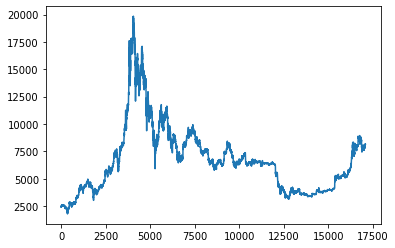

In [10]:
plot(datamatrix.close);

In [11]:
#datamatrix.dump_tsys("data.tsys")

In [12]:
datalen = len(datamatrix)

d_open = np.array(datamatrix.open)
d_high = np.array(datamatrix.high)
d_low = np.array(datamatrix.low)
d_close = np.array(datamatrix.close)
d_volume = np.array(datamatrix.volume)
d_year = np.array([x.year for x in datamatrix.get_dt_list()])
d_month = np.array([x.month for x in datamatrix.get_dt_list()])
d_day = np.array([x.day for x in datamatrix.get_dt_list()])
d_hour = np.array([x.hour for x in datamatrix.get_dt_list()])
d_minute = np.array([x.minute for x in datamatrix.get_dt_list()])
d_second = np.array([x.second for x in datamatrix.get_dt_list()])

In [13]:
import datamodel_super as dm
dmodel = dm.DataModel()
dmodel.input(np.vstack([d_open, d_high, d_low, d_close, d_volume, 
                        d_year, d_month, d_day, d_hour, d_minute, d_second]))

In [14]:
dmodel.process()
nc = dmodel.cut_nans()
nc

178

In [15]:
dmodel.data.shape

(176, 16900)

In [16]:
dmodel.data[0:10, 0:5]

array([[-0.0086413 , -0.00079595,  0.21964728, -0.01217723,  0.04395568],
       [-0.07062548,  0.18929299, -0.02356503,  0.12932109, -0.0761762 ],
       [ 0.0046699 , -0.00281636,  0.1172756 ,  0.07267002, -0.0347369 ],
       [-0.00078882,  0.21965736, -0.01217026,  0.04396341, -0.01526424],
       [ 0.06281489,  0.02619235,  0.15411725,  0.15799656,  0.24971456],
       [ 0.05447114,  0.1307339 ,  0.12293646,  0.21874036,  0.14704195],
       [ 0.07413365,  0.07409057,  0.11756229,  0.22087766,  0.19675063],
       [ 0.02616775,  0.15406457,  0.15794303,  0.24964089,  0.13088616],
       [ 0.01390683,  0.23811896,  0.15762464,  0.15587815,  0.1048766 ],
       [ 0.11759762,  0.12772463,  0.12623881,  0.11106784,  0.13624852]])

In [17]:
tgt = np.vstack([d_open[nc:], 
                 d_high[nc:], 
                 d_low[nc:], 
                 d_close[nc:]])
tgt.shape

(4, 16900)

In [18]:
tgt[:, 0:5]

array([[2541.41, 2541.67, 2561.88, 2561.11, 2565.42],
       [2547.48, 2563.5 , 2561.88, 2572.93, 2566.95],
       [2541.01, 2541.07, 2552.68, 2560.  , 2556.99],
       [2541.67, 2561.88, 2561.11, 2565.42, 2564.37]])

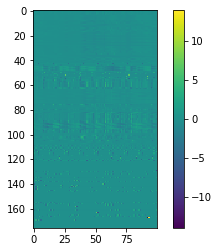

In [19]:
imshow(dmodel.data[:, 0:100]); colorbar();

In [20]:
np.save(open("data_btc_1h.npy",'wb'), dmodel.data)
np.save(open("data_btc_1h_targets.npy",'wb'), tgt)

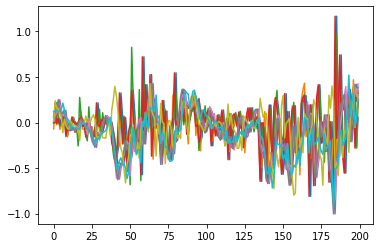

In [21]:
plot(dmodel.data.T[0:200, 0:10]);

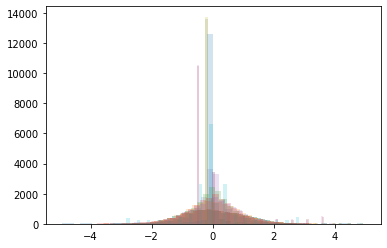

In [22]:
for i in list(range(dmodel.data.shape[0]))[45:60]:
    a = dmodel.data[i]
    a = a[where((a > -5) & (a < 5) )]
    hist(a, 50, alpha=0.2);

In [23]:
mean(a)

-0.0016327676431879899